## Importando las bibliotecas necesarias

In [1]:
import pandas as pd
import math
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt

## Preparando los datos
Aquí se agrupan los datos necesarios de 3 competencias (las 3 más recientes con datos) para la simulación: En un diccionario se almacenan como llaves los nombres de los atletas, y como valores los puntos obtenidos en las competencias anteriores a esta. Los puntos se almacenan en orden cronológico, de la comoetencia más reciente a la menos reciente.

In [2]:
data = pd.read_csv('Data_B_boys.csv')

# Obteniendo cada jugador con sus respectivos puntos
# Ordenados por fecha

def Points_before_BfG_World_Series_0(): # Competencia del 15 de diciembre del 2023
    dict_ = {}
    for i, item in enumerate(data['Name']):
        if math.isnan(data['Points'][i]):
            continue
        if data['Name'][i] in dict_:
            if data['Date'][i] != '15-Dec-23':
                dict_[data['Name'][i]].append(data['Points'][i])

        elif data['Date'][i] != '15-Dec-23':
            dict_[data['Name'][i]] = [data['Points'][i]]

    return dict_

def Points_before_BfG_World_Series_1(): # Competencia del 30 de agosto del 2023
    dict_ = {}
    for i, item in enumerate(data['Name']):
        if math.isnan(data['Points'][i]):
            continue
        if data['Name'][i] in dict_:
            if data['Date'][i] != '15-Dec-23' and data['Date'][i] != '23-Sept-23' and data['Date'][i] != '30-Aug-23':
                dict_[data['Name'][i]].append(data['Points'][i])

        elif data['Date'][i] != '15-Dec-23' and data['Date'][i] != '23-Sept-23' and data['Date'][i] != '30-Aug-23':
            dict_[data['Name'][i]] = [data['Points'][i]]

    return dict_

def Points_before_Continental_Championship(): # Competencia del 6 de mayo del 2023
    dict_ = {}
    for i, item in enumerate(data['Name']):
        if math.isnan(data['Points'][i]):
            continue
        if data['Name'][i] in dict_:
            if data['Date'][i] != '15-Dec-23' and data['Date'][i] != '23-Sept-23' and data['Date'][i] != '30-Aug-23' and data['Date'][i] != '26-Jun-23' and data['Date'][i] != '3-Jun-23' and data['Date'][i] != '17-May-23'and data['Date'][i] != '6-May-23':
                dict_[data['Name'][i]].append(data['Points'][i])

        elif data['Date'][i] != '15-Dec-23' and data['Date'][i] != '23-Sept-23' and data['Date'][i] != '30-Aug-23' and data['Date'][i] != '26-Jun-23' and data['Date'][i] != '3-Jun-23' and data['Date'][i] != '17-May-23'and data['Date'][i] != '6-May-23':
            dict_[data['Name'][i]] = [data['Points'][i]]

    return dict_

## Simulaciones
Aquí se definen 2 métodos de simulación basados en KDE, con tophat como kernel y un bandwidth = 0.75. Con la distribución hallada gracias a las puntuaciones anteriores se predice las puntuaciones de la competencia que se desee. Ambos métodos devuelven un array de puntuaciones, donde cada posición del array coincide con la posición en el array de nombres *auxN* que se pasó como parámetro, prediciéndose una puntuación para cada atleta.

En el segundo método se le aplica un peso a las puntuaciones de las competencias más recientes, siendo estas más importantes a tener en cuenta.

In [37]:
def Simulate_Event(Evento, fecha, kernel_, dict_):
    auxN = []
    auxR = []

    for i, item in enumerate(data['Event']):
        if item == Evento and data['Date'][i] == fecha and data['Name'][i] in dict_ and not math.isnan(data['Points'][i]):
            auxN.append(data['Name'][i])
            auxR.append(data['Points'][i])
            
    auxT = []
    for item in auxN:
        c = np.array(dict_[item])
        kde = KernelDensity(kernel=kernel_, bandwidth=0.75).fit(c.reshape(-1, 1))
        auxT.append(int(kde.sample(1)[0][0]))
    aux = [auxR, auxT]
    for i in range(len(aux)):
        plt.plot(aux[i])
    
    return auxN, auxR, auxT

def Simulate_Event_Weight(auxN, auxR, kernel_, dict_):
    auxT1 = []
    for item in auxN:
        c = np.array(dict_[item])
        d = []
        for i in range(len(c)):
            d.append(1/(2*i + 1))
        d = np.array(d)
        kde = KernelDensity(kernel=kernel_, bandwidth=0.75).fit(X = c.reshape(-1, 1), sample_weight= d)
        auxT1.append(int(kde.sample(1)[0][0]))

    aux = [auxR, auxT1]
    for i in range(len(aux)):
        plt.plot(aux[i])
    
    return auxT1

## *n* simulaciones

In [4]:
def simulate_n(auxN, kernel_, n, dict_):
    n_simulations = []
    for i in range(n):
        simulation = []
        for item in auxN:
            c = np.array(dict_[item])
            kde = KernelDensity(kernel= kernel_, bandwidth=0.75).fit(c.reshape(-1, 1))
            simulation.append(int(kde.sample(1)[0][0]))
        plt.plot(simulation)
        n_simulations.append(simulation)

    return n_simulations

def simulate_weight_n(auxN, kernel_, n, dict_):
    n_simulations = []
    for i in range(n):
        simulation = []
        for item in auxN:
            c = np.array(dict_[item])
            d = []
            for i in range(len(c)):
                d.append(1/(2*i + 1))
            d = np.array(d)
            kde = KernelDensity(kernel=kernel_, bandwidth=0.75).fit(X = c.reshape(-1, 1), sample_weight= d)
            simulation.append(int(kde.sample(1)[0][0]))
        plt.plot(simulation)
        n_simulations.append(simulation)
        
    return n_simulations

# *BfG World Series* del _15-Dec-23_

## Representación visual de las simulaciones

### Simulación `sin peso`

azul --------> Valores reales de la competencia 
anaranjado --> Valores simulados


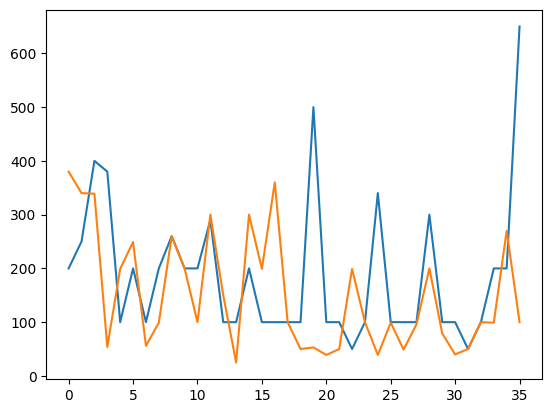

In [5]:
names_0, real_points_0, simulados_0 = Simulate_Event('BfG World Series', '15-Dec-23', "tophat", Points_before_BfG_World_Series_0())
print('azul --------> Valores reales de la competencia \nanaranjado --> Valores simulados')

### Simulación `con peso`

azul --------> Valores reales de la competencia 
anaranjado --> Valores simulados


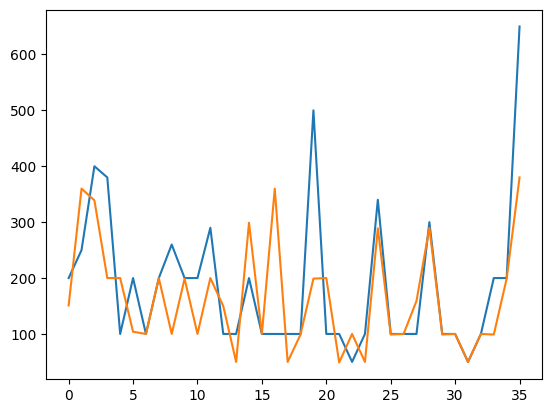

In [6]:
simulados_1 = Simulate_Event_Weight(names_0, real_points_0, "tophat", Points_before_BfG_World_Series_0())
print('azul --------> Valores reales de la competencia \nanaranjado --> Valores simulados')

## Representación visual de *n* simulaciones

### Simulación `Sin peso`

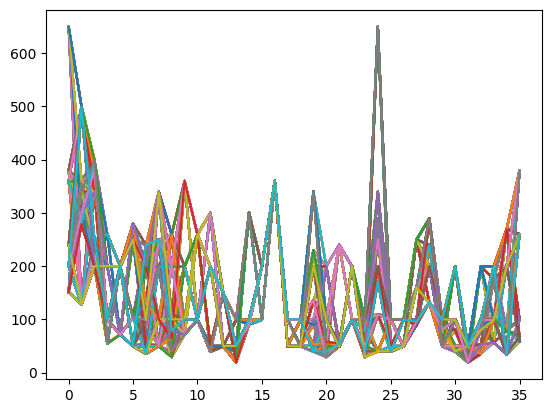

In [7]:
n_simulations = simulate_n(names_0, "tophat", 1000, Points_before_BfG_World_Series_0())

### Simulación `Con peso`

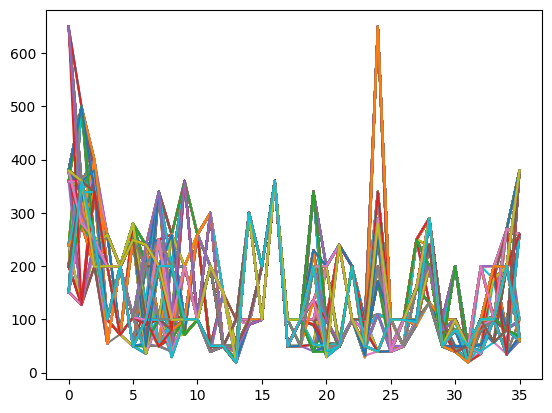

In [8]:
n_simulations_weight = simulate_weight_n(names_0, "tophat", 1000, Points_before_BfG_World_Series_0())

### Obtención de los rankings a partir de las puntuaciones

In [9]:
import copy

def Get_Rankings(names, points):
    new_dict = {}
    names_copy = copy.copy(names)
    points_copy = copy.copy(points)

    for i in range(len(names) - 1):
        for j in range(i, len(names)):
            if points_copy[i] < points_copy[j]:
                a = points_copy[i]
                b = names_copy[i]
                points_copy[i] = points_copy[j]
                names_copy[i] = names_copy[j]
                points_copy[j] = a
                names_copy[j] = b
    
    for i in range(len(names_copy)):
        new_dict[names_copy[i]] = i + 1
    
    ranking = []
    for i in range(len(names)):
        ranking.append(new_dict[names[i]])
    
    return ranking

## Comprobando la precisión de las simulaciones


Primero, realizamos una comparación entre la media de 1000 simulaciones y la de los resultados reales, mediante un ttest.

$H_0$: No existe una diferencia significativa entre los resultados originales y los simulados.

$H_1$: Existe una diferencia significativa entre los resultados originales y los simulados.

In [10]:
from scipy.stats import ttest_rel

means = []
means_weight = []

for i in range(len(names_0)):
    aux = []
    for j in range(len(n_simulations)):
        aux.append(n_simulations[j][i])  
    means.append(np.mean(aux)) 

for i in range(len(names_0)):
    aux = []
    for j in range(len(n_simulations_weight)):
        aux.append(n_simulations_weight[j][i])  
    means_weight.append(np.mean(aux))

# Resultados originales y simulaciones
resultados_originales = np.array(real_points_0)
resultados_simulacion1 = np.array(means)
resultados_simulacion2 = np.array(means_weight)

# Prueba t de Student para muestras relacionadas (resultados originales vs. simulación 1)
t_statistic1, p_value1 = ttest_rel(resultados_originales, resultados_simulacion1)

# Prueba t de Student para muestras relacionadas (resultados originales vs. simulación 2)
t_statistic2, p_value2 = ttest_rel(resultados_originales, resultados_simulacion2)

# Nivel de significancia (α)
alpha = 0.05

# Compara p-values con α
if p_value1 < alpha:
    print("Rechazamos la hipótesis nula para la simulación 1.")
else:
    print("No rechazamos la hipótesis nula para la simulación 1.")
print(t_statistic1)
if p_value2 < alpha:
    print("Rechazamos la hipótesis nula para la simulación 2.")
else:
    print("No rechazamos la hipótesis nula para la simulación 2.")
print(t_statistic2)

No rechazamos la hipótesis nula para la simulación 1.
1.9651199417583436
No rechazamos la hipótesis nula para la simulación 2.
1.5464668047932197


#### Luego, se usa una métrica basada en probabilidades, donde se compara la probabilidad de que un atleta haya quedado en el ranking real de la comptencia, luego de realizar mil simulaciones

### Cálculo de la probabilidad
Aquí se calcula la probabilidad de que en las *n* simulaciones un atleta `A` haya quedado en la posición `k` (posición real en la competencia) dado que no quedó en las `k-1` posiciones anteriores en algunas de las *n* simulaciones. Se asume independencia entre las variables. AL resultado de hallar la probabilidad se le multiplica un parámetro $\alpha$, 0 $\leq \alpha \leq$ 1, que dona más peso a los primeros lugares predichos. Téngase en cuenta que la suma de todos los alphas es igual a 1.

**Ejemplo:** $\alpha$ * P(A = 3| A != 2 and A != 1)

In [11]:
def Get_dictionaries(points_simulated, names, n):
    dictionaries = []
    new_dict = {}

    for i in range(1, len(names) + 1):
        new_dict[i] = 0

    for i in range(len(names)):
        _new_dict = copy.copy(new_dict)
        dictionaries.append(_new_dict)
    
    rankings_simulated = []

    for i in range(n):
         rankings_simulated.append(Get_Rankings(names, points_simulated[i]))
    
    for i in range(n):
        for j in range(len(names)):
            dictionaries[j][rankings_simulated[i][j]] +=1

    for i in range(len(dictionaries)):
        for j in range(1, len(names) + 1):
            dictionaries[i][j] = dictionaries[i][j]/n
    
    return dictionaries

In [53]:
def Calculate_prob(rank_prob, real_results, i):    
    k = int(real_results[i])
    restriction = 0
    
    for j in range(k, len(real_results) + 1):
       
       restriction += rank_prob[i][j]
       
    if restriction == 0: return rank_prob[i][k]
    return rank_prob[i][k]/restriction


def Probability_based(rank_prob, real_results):
    sum = 0
    alpha_sum = 0
    k = 0.01

    for i in range(len(real_results)):
        sum +=  np.exp(-k * real_results[i]) * Calculate_prob(rank_prob, real_results, i)
        alpha_sum += np.exp(-k * real_results[i])
        
    return sum/alpha_sum
    

### Comprobando la precisión en cuanto a probabilidad de 1000 simulaciones del 1er método (sin peso)

In [54]:
dictionaries = Get_dictionaries(n_simulations, names_0, 1000)
result = Probability_based(dictionaries, Get_Rankings(names_0, real_points_0))

print(f"Precision del método: {result}")

Precision del método: 0.09244520280540738


### Comprobando la precisión en cuanto a probabilidad de 1000 simulaciones del 2do método (con peso)

In [55]:
dictionaries = Get_dictionaries(n_simulations_weight, names_0, 1000)
result = Probability_based(dictionaries, Get_Rankings(names_0, real_points_0))

print(f"Precision del método: {result}")

Precision del método: 0.11360667598245647


# *BfG World Series* del _30-Aug-23_

## Representación visual de las simulaciones

### Simulación `sin peso`

azul --------> Valores reales de la competencia 
anaranjado --> Valores simulados


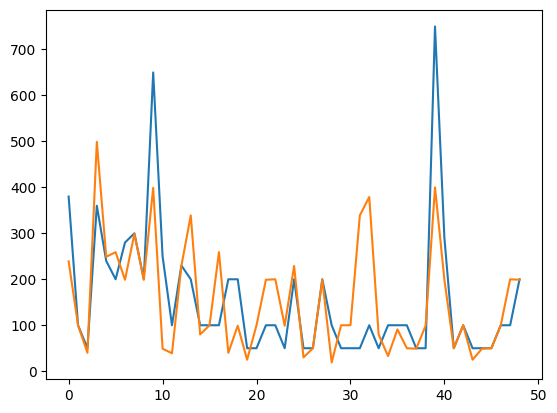

In [15]:
names_2, real_points_2, simulados_2 = Simulate_Event('BfG World Series', '30-Aug-23', "tophat", Points_before_BfG_World_Series_1())
print('azul --------> Valores reales de la competencia \nanaranjado --> Valores simulados')

### Simulación `con peso`

azul --------> Valores reales de la competencia 
anaranjado --> Valores simulados


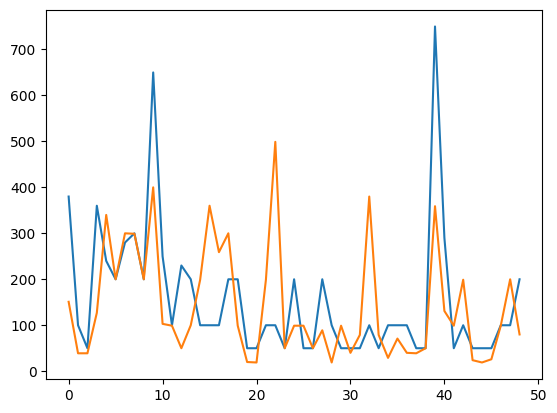

In [16]:
simulados_3 = Simulate_Event_Weight(names_2, real_points_2, "tophat", Points_before_BfG_World_Series_1())
print('azul --------> Valores reales de la competencia \nanaranjado --> Valores simulados')

## Representación visual de *n* simulaciones

### Simulación `Sin peso`

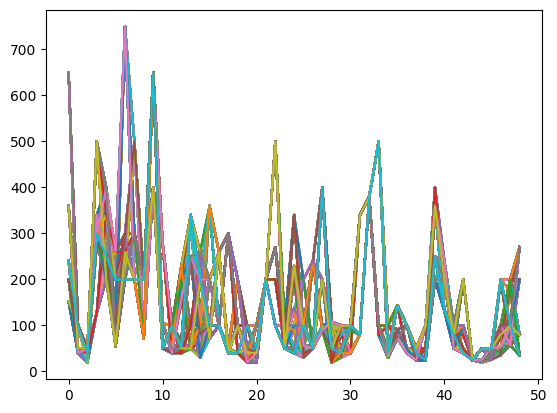

In [17]:
n_simulations_ = simulate_n(names_2, "tophat", 1000, Points_before_BfG_World_Series_1())

### Simulación `con peso`

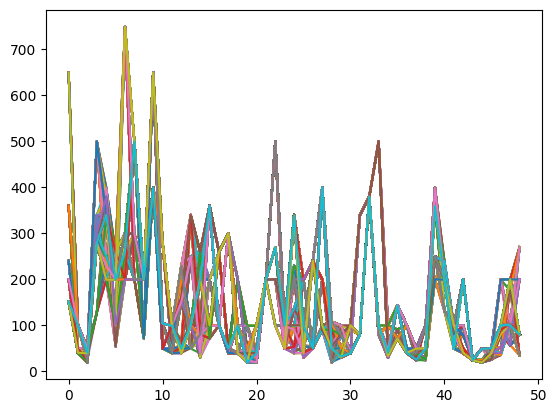

In [18]:
n_simulations_weight_ = simulate_weight_n(names_2, "tophat", 1000, Points_before_BfG_World_Series_1())

### Comprobando la precisión de 1000 simulaciones 

$H_0$: No existe una diferencia significativa entre los resultados originales y los simulados.

$H_1$: Existe una diferencia significativa entre los resultados originales y los simulados.

In [19]:
from scipy.stats import ttest_rel

means_ = []
means_weight_ = []

for i in range(len(names_2)):
    aux = []
    for j in range(len(n_simulations_)):
        aux.append(n_simulations_[j][i])  
    means_.append(np.mean(aux)) 

for i in range(len(names_2)):
    aux = []
    for j in range(len(n_simulations_weight_)):
        aux.append(n_simulations_weight_[j][i])  
    means_weight_.append(np.mean(aux))

# Resultados originales y simulaciones
resultados_originales_ = np.array(real_points_2)
resultados_simulacion1_ = np.array(means_)
resultados_simulacion2_ = np.array(means_weight_)

# Prueba t de Student para muestras relacionadas (resultados originales vs. simulación 1)
t_statistic1, p_value1 = ttest_rel(resultados_originales_, resultados_simulacion1_)

# Prueba t de Student para muestras relacionadas (resultados originales vs. simulación 2)
t_statistic2, p_value2 = ttest_rel(resultados_originales_, resultados_simulacion2_)

# Nivel de significancia (α)
alpha = 0.05

# Compara p-values con α
if p_value1 < alpha:
    print("Rechazamos la hipótesis nula para la simulación 1.")
else:
    print("No rechazamos la hipótesis nula para la simulación 1.")
print(t_statistic1)
if p_value2 < alpha:
    print("Rechazamos la hipótesis nula para la simulación 2.")
else:
    print("No rechazamos la hipótesis nula para la simulación 2.")
print(t_statistic2)

No rechazamos la hipótesis nula para la simulación 1.
0.3298401300123197
No rechazamos la hipótesis nula para la simulación 2.
-0.289997903104547


### Comprobando la precisión en cuanto a probabilidad de 1000 simulaciones del 1er método (sin peso)

In [61]:
dictionaries = Get_dictionaries(n_simulations_, names_2, 1000)
result = Probability_based(dictionaries, Get_Rankings(names_2, real_points_2))

print(f"Precision del método: {result}")

Precision del método: 0.12461255997841506


### Comprobando la precisión en cuanto a probabilidad de 1000 simulaciones del 2do método (con peso)

In [58]:
dictionaries = Get_dictionaries(n_simulations_weight_, names_2, 1000)
result = Probability_based(dictionaries, Get_Rankings(names_2, real_points_2))

print(f"Precision del método: {result}")

Precision del método: 0.1349501672124217


# *Continental Championship* del *6-May-23*

## Representación visual de las simulaciones

### Simulación `sin peso`

azul --------> Valores reales de la competencia 
anaranjado --> Valores simulados


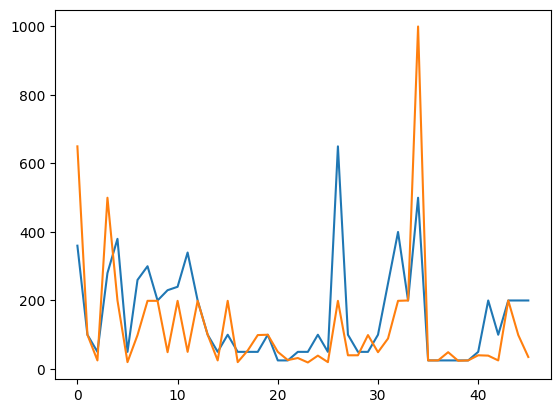

In [22]:
names_4, real_points_4, simulados_4 = Simulate_Event('Continental Championship', '6-May-23', "tophat", Points_before_Continental_Championship())
print('azul --------> Valores reales de la competencia \nanaranjado --> Valores simulados')

### Simulación `con peso`

azul --------> Valores reales de la competencia 
anaranjado --> Valores simulados


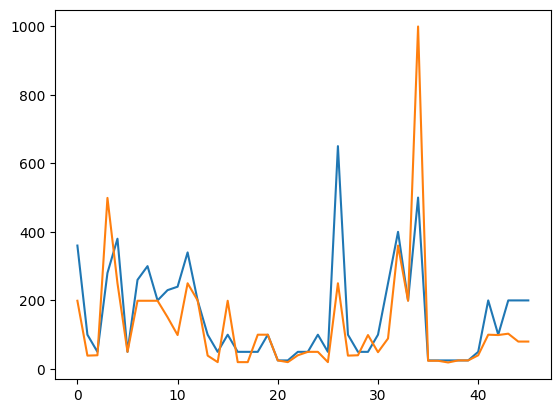

In [23]:
simulados_5 = Simulate_Event_Weight(names_4, real_points_4, "tophat", Points_before_Continental_Championship())
print('azul --------> Valores reales de la competencia \nanaranjado --> Valores simulados')

## Representación visual de *n* simulaciones

### Simulación `Sin peso`

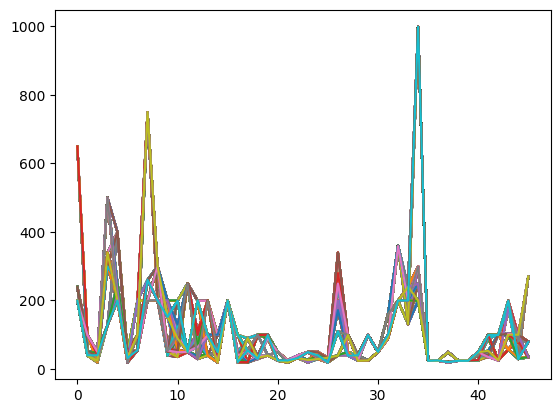

In [24]:
n_simulations__ = simulate_n(names_4, "tophat", 1000, Points_before_Continental_Championship())

### Simulación `con peso`

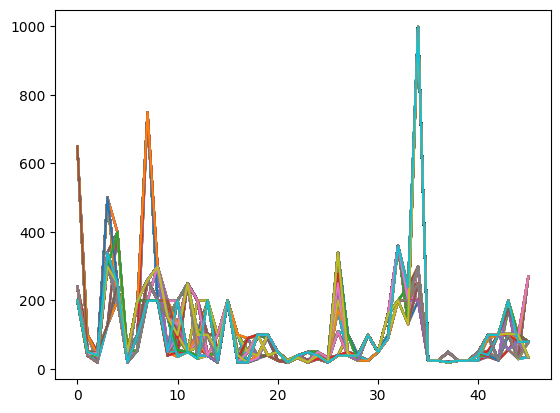

In [25]:
n_simulations_weight__ = simulate_weight_n(names_4, "tophat", 1000, Points_before_Continental_Championship())

### Comprobación de la precisión de las simulaciones

$H_0$: No existe una diferencia significativa entre los resultados originales y los simulados.

$H_1$: Existe una diferencia significativa entre los resultados originales y los simulados.

In [26]:
from scipy.stats import ttest_rel

means__ = []
means_weight__ = []

for i in range(len(names_4)):
    aux = []
    for j in range(len(n_simulations__)):
        aux.append(n_simulations__[j][i])  
    means__.append(np.mean(aux)) 

for i in range(len(names_4)):
    aux = []
    for j in range(len(n_simulations_weight__)):
        aux.append(n_simulations_weight__[j][i])  
    means_weight__.append(np.mean(aux))

# Resultados originales y simulaciones
resultados_originales__ = np.array(real_points_4)
resultados_simulacion1__ = np.array(means__)
resultados_simulacion2__ = np.array(means_weight__)

# Prueba t de Student para muestras relacionadas (resultados originales vs. simulación 1)
t_statistic1, p_value1 = ttest_rel(resultados_originales__, resultados_simulacion1__)

# Prueba t de Student para muestras relacionadas (resultados originales vs. simulación 2)
t_statistic2, p_value2 = ttest_rel(resultados_originales__, resultados_simulacion2__)

# Nivel de significancia (α)
alpha = 0.05

# Compara p-values con α
if p_value1 < alpha:
    print("Rechazamos la hipótesis nula para la simulación 1.")
else:
    print("No rechazamos la hipótesis nula para la simulación 1.")
print(t_statistic1)
if p_value2 < alpha:
    print("Rechazamos la hipótesis nula para la simulación 2.")
else:
    print("No rechazamos la hipótesis nula para la simulación 2.")
print(t_statistic2)

Rechazamos la hipótesis nula para la simulación 1.
3.20465420909246
Rechazamos la hipótesis nula para la simulación 2.
2.774176449530319


### Comprobando la precisión en cuanto a probabilidad de 1000 simulaciones del 1er método (sin peso)

In [59]:
dictionaries = Get_dictionaries(n_simulations__, names_4, 1000)
result = Probability_based(dictionaries, Get_Rankings(names_4, real_points_4))

print(f"Precision del método: {result}")

Precision del método: 0.1476844315888684


### Comprobando la precisión en cuanto a probabilidad de 1000 simulaciones del 2do método (con peso)

In [60]:
dictionaries = Get_dictionaries(n_simulations_weight__, names_4, 1000)
result = Probability_based(dictionaries, Get_Rankings(names_4, real_points_4))

print(f"Precision del método: {result}")

Precision del método: 0.16805081576483974


<function countplot at 0x0000027BAD572CA0>


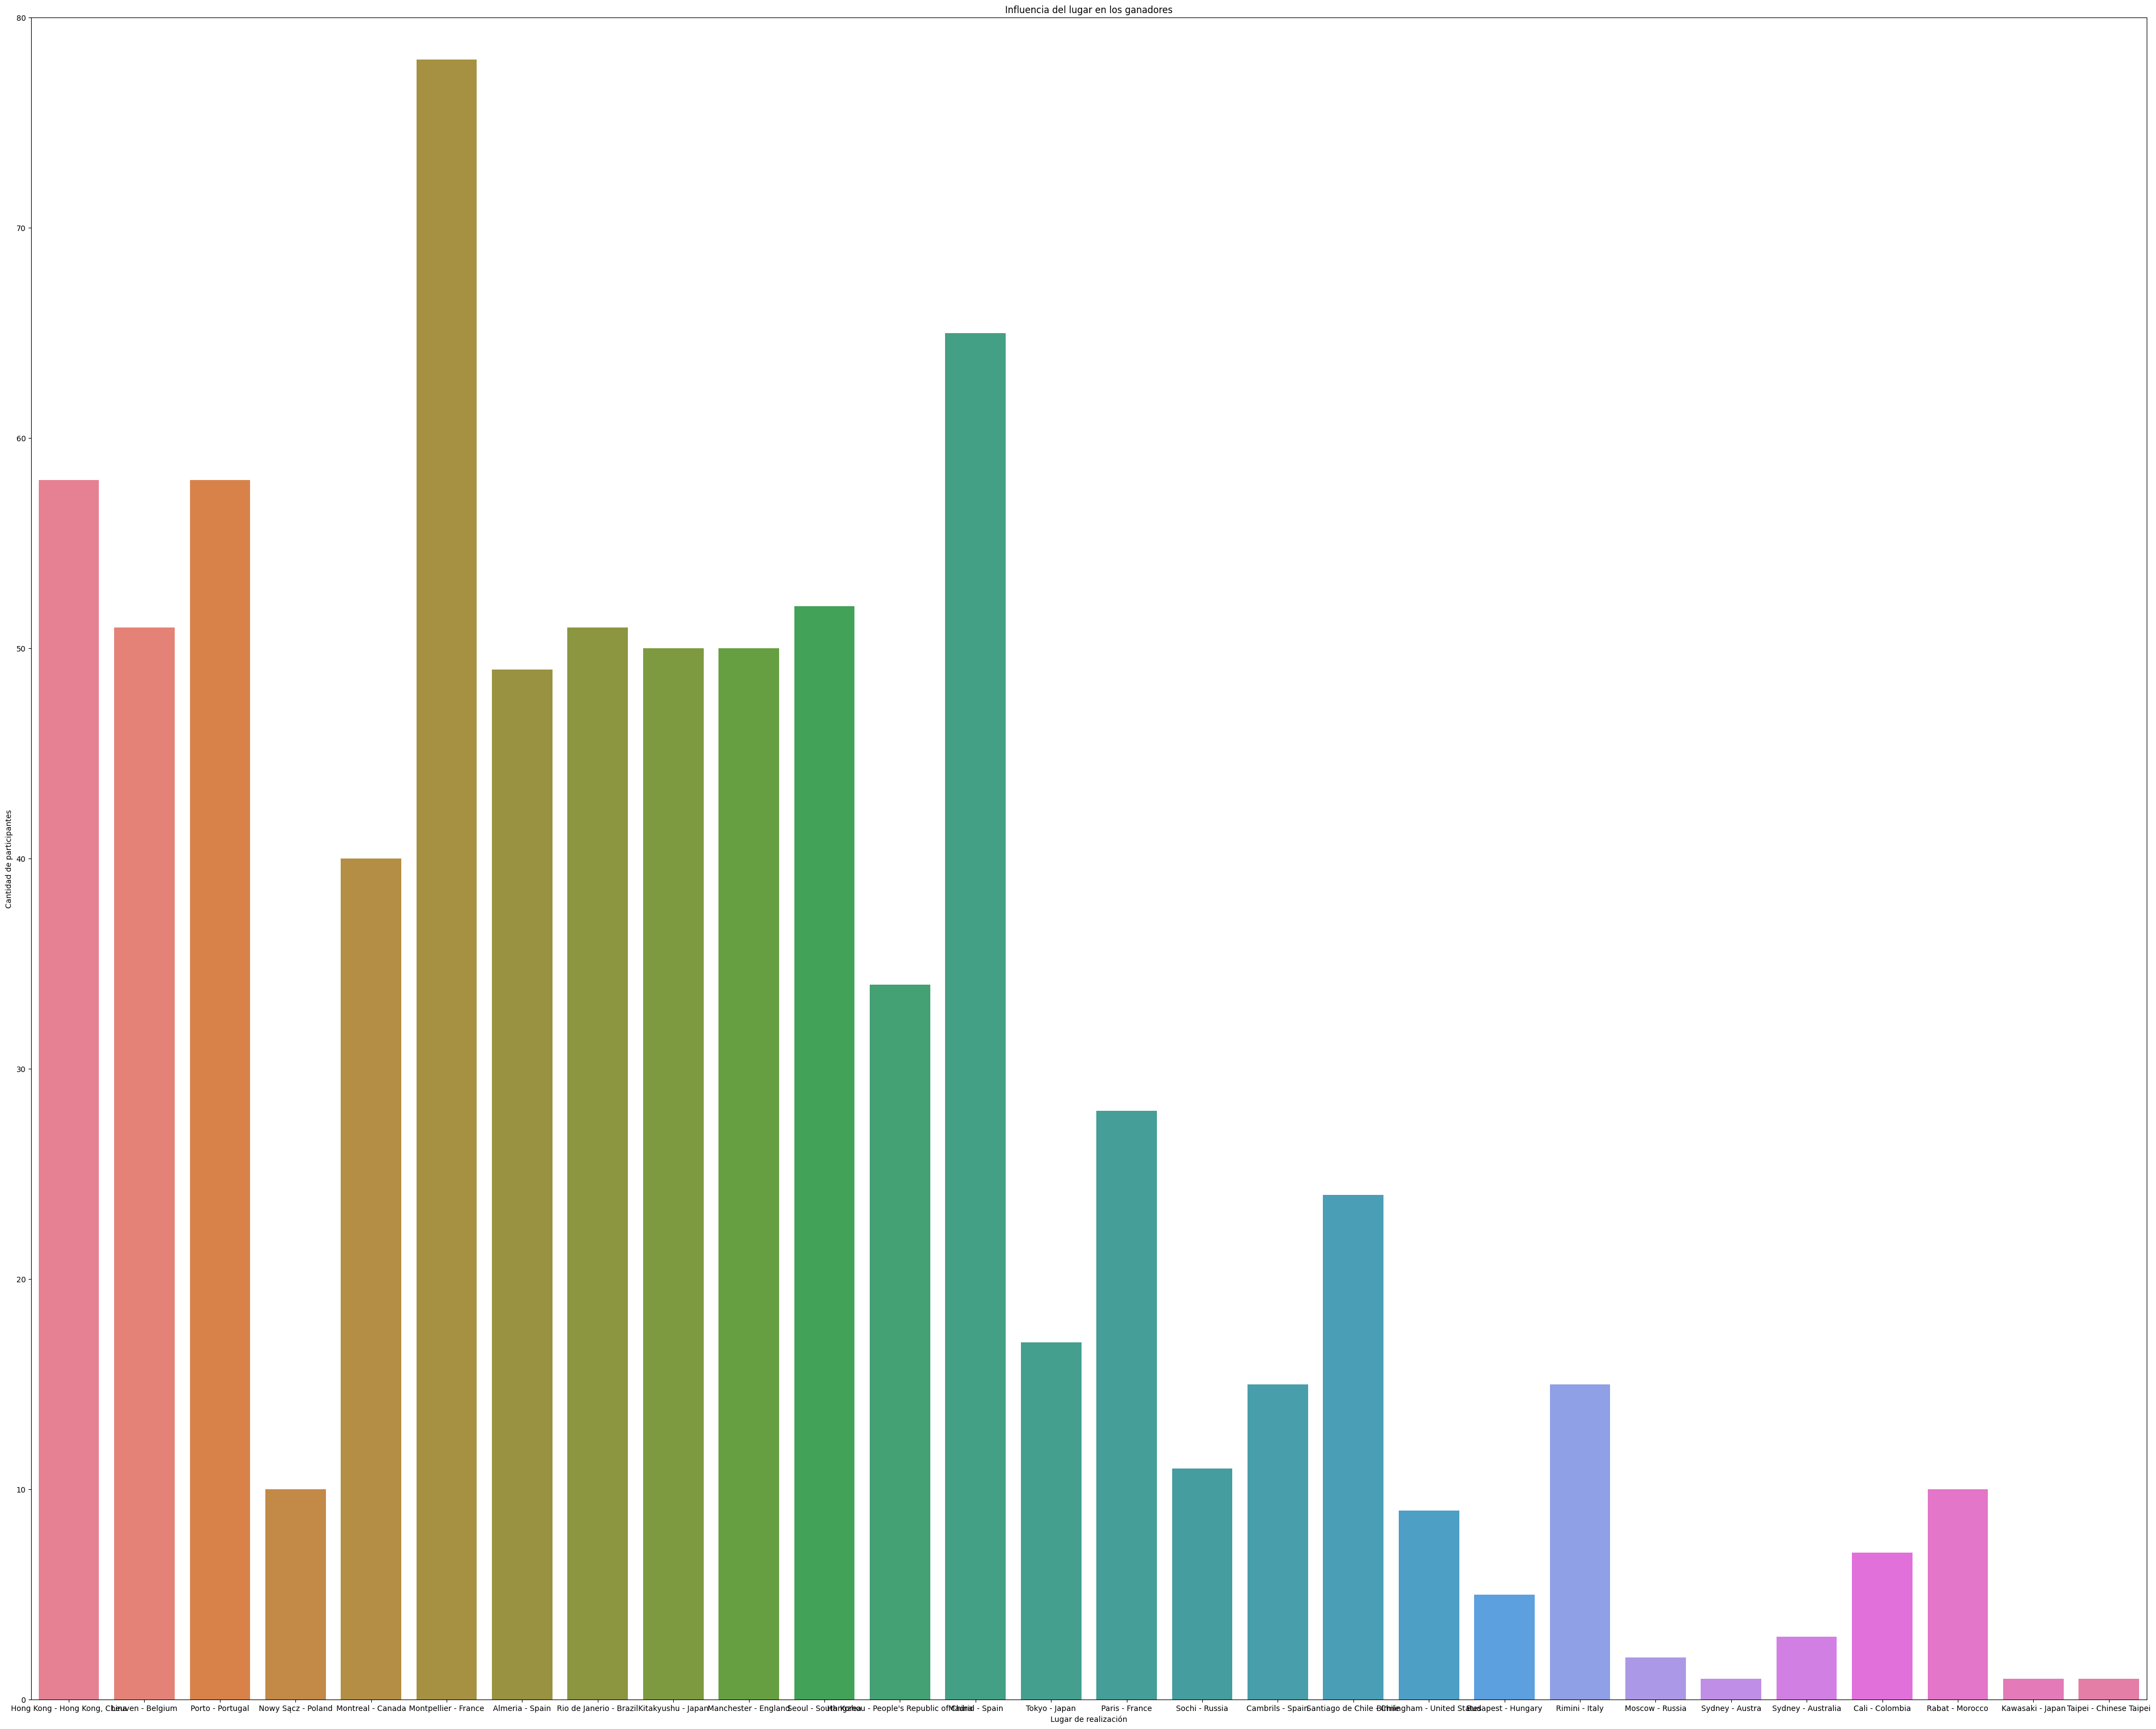

In [29]:
participantes_por_lugar = data.groupby("Location")["Name"].sum()
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un gráfico de conteo
plt.figure(figsize=(50, 40))
sns.countplot(data=data, x="Location", hue="Location")
plt.xlabel("Lugar de realización")
plt.ylabel("Cantidad de participantes")
plt.title("Influencia del lugar en los ganadores")
plt.ylim(0,80)
#plt.show()
print(sns.countplot)


### **Análisis sobre la influencia del lugar (ciudad y país) en el que se realiza una competencia en los puntos que tuvieron los atletas que participaron en ella, respecto a los obtenidos en otra competencia.**

$H_0$: No hay una diferencia significativa entre los puntos otorgados en una competencias, respecto a los otorgados en otra.

$H_1$: Hay una diferencia significativa entre los puntos otorgados en una competencias, respecto a los otorgados en otra.

In [30]:
from scipy.stats import f_oneway

def participantes_x_lugar(lugar):
    aux = []
    for i, item in enumerate(data['Location']):
        if item == lugar and data['Points'][i] >= 0:
            aux.append(data['Points'][i])
    return aux
lugar1 = participantes_x_lugar("Madrid - Spain")
lugar2 = participantes_x_lugar("Seoul - South Korea")
lugar3 = participantes_x_lugar("Rio de Janerio - Brazil")

f_statistic, p_value = f_oneway(lugar1, lugar2, lugar3)
print(f"Estadística F: {f_statistic:.2f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("Hay una diferencia significativa entre los lugares.")
else:
    print("No hay evidencia suficiente para afirmar una diferencia significativa.")

Estadística F: 11.26
Valor p: 0.0000
Hay una diferencia significativa entre los lugares.
